# Photo Quality


Use the "Run" button to execute the code.

# Installing Libaries and downloading dataset

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

In [ ]:
!pip install pandas numpy matplotlib seaborn --quiet

In [ ]:
import opendatasets as od 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib 
import jovian 
import os 
import plotly.express as px
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns' ,None)
pd.set_option('display.max_rows' , 150) 
sns.set_style('darkgrid') 
matplotlib.rcParams['font.size'] = 14 
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [ ]:
od.download('https://www.kaggle.com/c/PhotoQualityPrediction/data')

In [ ]:
os.listdir('PhotoQualityPrediction')

# Exploring datasets

In [ ]:
photo_df = pd.read_csv('PhotoQualityPrediction/training.csv')

In [ ]:
test_df = pd.read_csv('PhotoQualityPrediction/test.csv')

In [ ]:
photo_df

,id,latitude,longitude,width,height,size,name,description,caption,good
0,1,45,16,604,453,31,454 1659,NaN,NaN,1
1,2,21,-87,720,534,43,2068 483,687 1182 1309 2068 2107 78 89 453 1905 712 120...,830 2112 1914 792 814 1386 474 2146 1591 194 5...,0
2,3,38,-97,720,540,71,802,NaN,NaN,0
3,4,38,-122,604,453,24,NaN,924 1914 671 853 193 51 744 1437 1245 563 1410...,665 2040 792 1056 226 248 1612 1920 617 1365 1...,0
4,5,-29,24,720,540,13,1766 20,NaN,181 891 22 2123 2107 523 2080 683 1640 166 109...,0
...,...,...,...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,919 1905 2088,1490 1644 919 1905 2088 1192 796,687 830 1017 990 2123 22 1309 1903 611 1304 12...,0
40258,40260,38,-120,604,453,4,1325 1348,2018 1426,1744 2015 658 164 54,0
40259,40261,29,-82,604,453,37,51 1829 367,NaN,786 830 1347 2057 792 1826 1716 1920 2041 171 ...,0
40260,40262,24,121,604,453,25,1443 1869,NaN,368 2029 1309 1573 755 370 1905 1823 916 740 1...,1


In [ ]:
photo_df.shape

In [ ]:
test_df

In [ ]:
photo_df.dtypes

In [ ]:
photo_df['description'].value_counts()

In [ ]:
photo_df.describe()

# Handling Categorical Features

In [ ]:
#identifying categorical columns
cat_train = [feature for feature in photo_df if photo_df[feature].dtypes == 'O']
cat_test = [feature for feature in test_df if test_df[feature].dtypes == 'O']


In [ ]:
#extracting train categorical cols
photo_df['names'] = photo_df['name'].str.extract(r'.*(\d\d).*').astype(float)
photo_df['descriptions'] = photo_df['description'].str.extract(r'.*(\d\d).*').astype(float)
photo_df['captions'] = photo_df['caption'].str.extract(r'.*(\d\d).*').astype(float)


In [ ]:
#extracting test categorical cols
test_df['names'] = test_df['name'].str.extract(r'.*(\d\d).*').astype(float)
test_df['descriptions'] = test_df['description'].str.extract(r'.*(\d\d).*').astype(float)
test_df['captions'] = test_df['caption'].str.extract(r'.*(\d\d).*').astype(float)


In [ ]:
#now we can drop all the features in train and test cat cols since we have extracted some files from them
photo_df.drop(columns = ['name', 'description','caption'], inplace= True)
test_df.drop(columns = ['name', 'description','caption'], inplace= True)

In [ ]:
photo_df.dtypes

In [ ]:
test_df.dtypes

In [ ]:
#re odering the train dataset
photos_df = photo_df[['id','latitude','longitude','width','height','size','names','descriptions','captions','good']]

# Missing Values and Scaling

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
photos_df.isna().sum()

In [ ]:
test_df.isna().sum()

In [ ]:
input_cols, target_col = photos_df.columns[1:-1], 'good'
inputs_df, targets = photos_df[input_cols].copy(), photos_df[target_col].copy()

In [ ]:
#let us fill in the missing values with median
#TRAIN
names_med = photos_df['names'].median()
descriptions_med = photos_df['descriptions'].median()
captions_med = photos_df['captions'].median()

#TEST
names_med = test_df['names'].median()
descriptions_med = test_df['descriptions'].median()
captions_med = test_df['captions'].median()



In [ ]:
#TRAIN
photos_df['names'].fillna(names_med, inplace = True)
photos_df['descriptions'].fillna(descriptions_med, inplace = True)
photos_df['captions'].fillna(captions_med, inplace = True)

#TEST
test_df['names'].fillna(names_med, inplace = True)
test_df['descriptions'].fillna(descriptions_med, inplace = True)
test_df['captions'].fillna(captions_med, inplace = True)

In [ ]:
numeric_train = photos_df[input_cols].select_dtypes(include=np.number).columns.tolist()
numeric_test = photos_df[input_cols].select_dtypes(include=np.number).columns.tolist()

In [ ]:
# scaling train
imputer = SimpleImputer().fit(inputs_df[numeric_train])
inputs_df[numeric_train] = imputer.transform(inputs_df[numeric_train])
scaler = RobustScaler().fit(inputs_df[numeric_train])
inputs_df[numeric_train] = scaler.transform(inputs_df[numeric_train])
#scaling test
imputer = SimpleImputer().fit(inputs_df[numeric_test])
inputs_df[numeric_test] = imputer.transform(inputs_df[numeric_test])
scaler = RobustScaler().fit(inputs_df[numeric_test])
inputs_df[numeric_test] = scaler.transform(inputs_df[numeric_test])

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_train], targets, test_size=0.25, random_state=42)

In [ ]:
jovian.commit()


In [ ]:
scaled_test = inputs_df[numeric_test]

In [ ]:
scaled_test.describe()

# Visualization

In [ ]:
px.histogram(photos_df, 
             x='latitude', 
             title='latitude vs. photo_quality', 
             color=photos_df['good'])

In [ ]:
px.histogram(photos_df, 
             x='longitude', 
             title='longitude vs. photo_quality', 
             color=photos_df['good'])

# Correlation Heat Map


Correlation heat map helps to kmow the correlaton between features. Correlation of 1 shows that features are perfectly correlated, correlation of -1 shows that features are inversely correlated (i.e as one goes up the other decreases) and a correlation of 0 shows that there is no correlstion between features
if we have two features with a very high correlation, one of them can be dropped to reduce noise.
Note that the dependent feature has to be dropped first

In [ ]:
photos_df

In [ ]:
corr = photos_df.iloc[:, :-1].corr() #remving the dependent feature i.e ['good']


In [ ]:
correlation = corr.index
plt.figure(figsize = (20, 20))
sns.heatmap(photos_df[correlation].corr(), annot = True)

From the heat map, we can see that the correlation between features are not too much, so there is no need to drop any feature

# RandomForestClassifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model1 = RandomForestClassifier()

In [ ]:
%%time
model1.fit(train_inputs,train_targets)

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Size seems to be the most important feature

In [ ]:
jovian.commit()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model1.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [ ]:
train_preds = predict_and_plot(train_inputs, train_targets, 'Training')

Accuracy: 75.91%


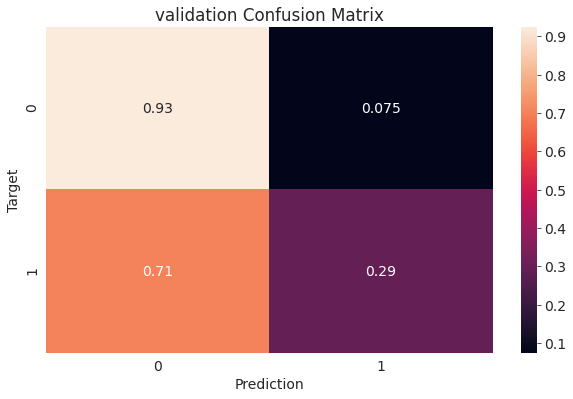

In [ ]:
test_preds = predict_and_plot(val_inputs, val_targets, 'validation')

In [ ]:
model1.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=2070007369)

In [ ]:
from sklearn.tree import plot_tree, export_text

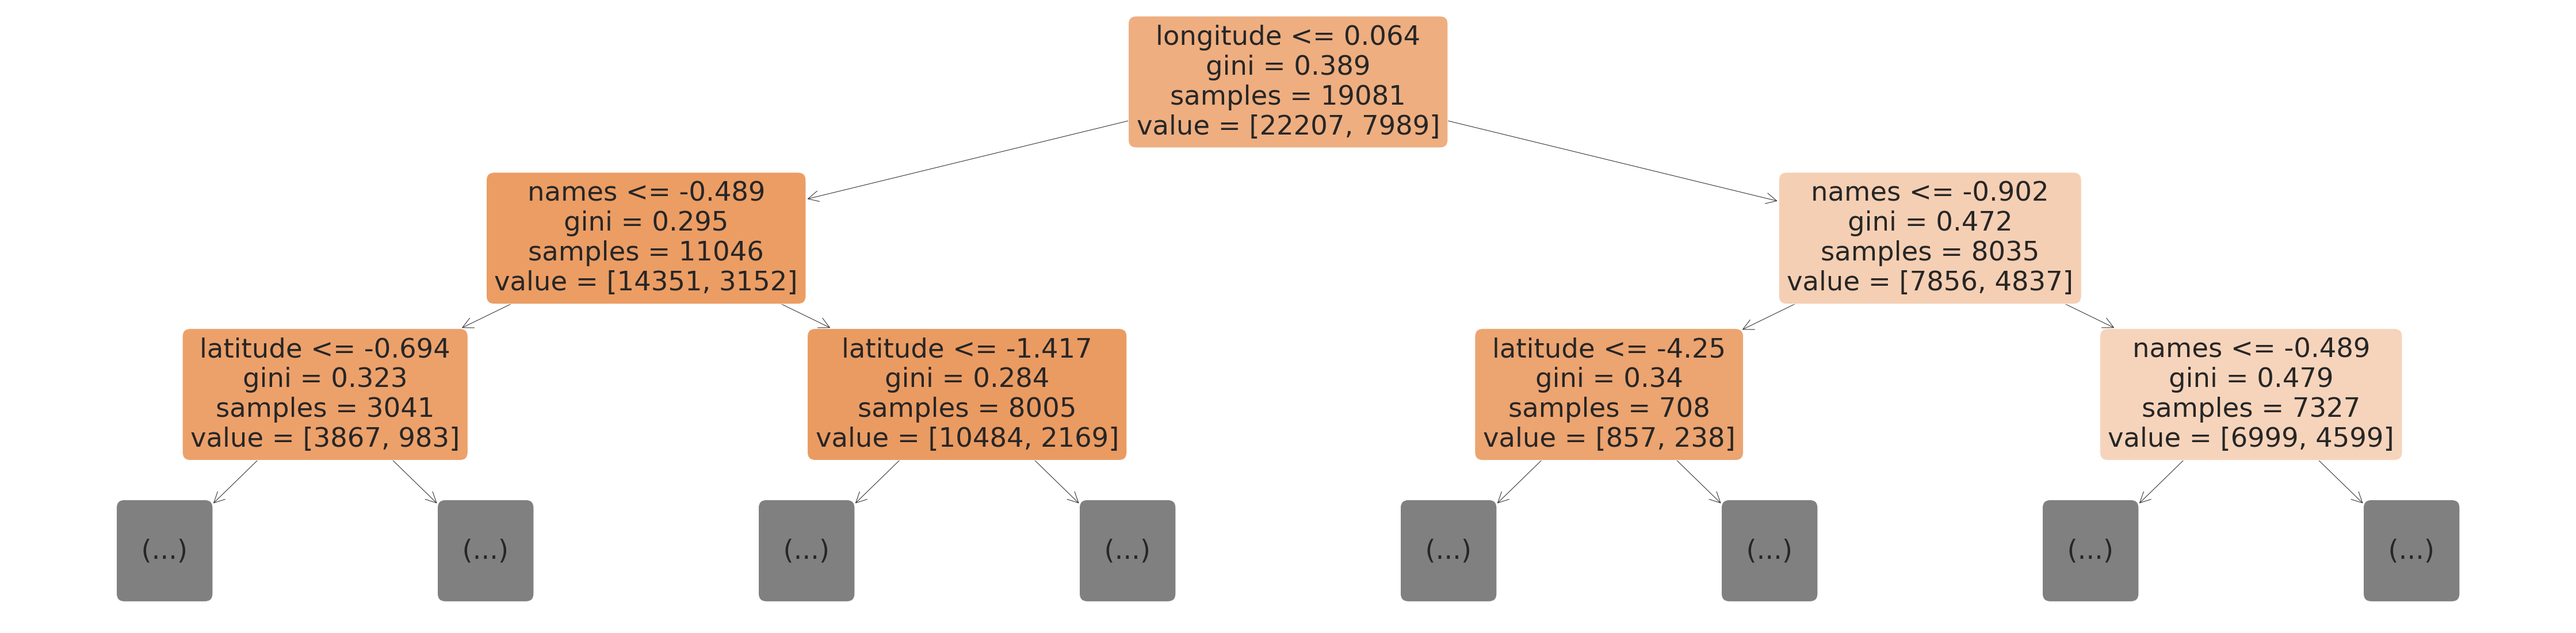

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model1.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True);

In [ ]:
test_pred = model1.predict_proba(scaled_test)
random_forest_pred = pd.DataFrame(test_pred)
random_forest_pred.columns = ['No', 'Yes']
random_forest_pred


,No,Yes
0,0.10,0.90
1,0.64,0.36
2,0.91,0.09
3,0.99,0.01
4,0.81,0.19
...,...,...
40257,0.89,0.11
40258,0.94,0.06
40259,1.00,0.00
40260,0.30,0.70


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/saolaolaoluwa/photo-quality-prediction


'https://jovian.ai/saolaolaoluwa/photo-quality-prediction'

In [ ]:
!pip install xgboost

# Xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model2 = XGBClassifier()

In [ ]:
%%time
model2.fit(train_inputs,train_targets)

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model2.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [ ]:
train_pred = predict_and_plot(train_inputs, train_targets, 'Training')

In [ ]:
test_pred = predict_and_plot(val_inputs, val_targets, 'validation')

# Catboost

In [ ]:
!pip install catboost

In [ ]:
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier


In [ ]:
model3 = CatBoostClassifier() 

In [ ]:
%%time
model3.fit(train_inputs,train_targets)

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model3.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [ ]:
train_pred = predict_and_plot(train_inputs, train_targets, 'Training')

In [ ]:
test_pred = predict_and_plot(val_inputs, val_targets, 'validation')

# Hyperparameter tuning (catboost)

In [ ]:
def test_params(**params):
    model = CatBoostClassifier(**params).fit(train_inputs, train_targets)
    train_acc = accuracy_score(model.predict(train_inputs), train_targets)
    test_acc = accuracy_score(model.predict(val_inputs), val_targets)
    return train_acc, test_acc

In [ ]:
test_params(n_estimators=20, max_depth=7)

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_accs, val_accs = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_acc, val_acc = test_params(**params)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accs, 'b-o')
    plt.plot(param_values, val_accs, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])

In [ ]:
 test_param_and_plot('learning_rate', [0.04, 0.05,0.06,0.07])

0.040 seems to be the best learning rate for validation accuracy

In [ ]:
 test_param_and_plot('depth', [5, 9, 10])

As the learning rate increases, the accuracy of train predictions increases (overfitting), whilst the validation accuracy remains almost the same

In [ ]:
 test_param_and_plot('n_estimators', [6500,7000])

In [ ]:
test_param_and_plot('random_state', [1500,2000,2500])

In [ ]:
jovian.commit()

In [ ]:
#Applying the hyperparameters
model = CatBoostClassifier(random_state = 2000, n_estimators = 6000, max_depth = 7,learning_rate =0.04)
model.fit(train_inputs,train_targets)

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [ ]:
predict_and_plot(train_inputs,train_targets, 'Training')

In [ ]:
predict_and_plot(val_inputs, val_targets, 'Validation')

After hyperparameter tuning, the validation accuracy appeared to drop a bit, but the error (false negative) reduced

# Recommendations


More models should be trained and probably blended

Feature engineering can be useful

More hyperparameters can also be tuned

# Relevant references
1.  https://jovian.ai/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fc%2FPhotoQualityPrediction

2.  https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms

<!-- Recommendations -->

In [ ]:
jovian.submit(assignment="zerotogbms-project")